# Лабораторная работа №2. 
Митрофанов Антон 



- Возможный план, близкий к изложенному во второй лекции. Реализовать вычисление дискретного преобразования Фурье для типовых последовательностей (единичный импульс, единичный скачок, синусоидальное колебание). 
- Проверить полученный результат с существующими реализациями дискретного преобразования Фурье на основе алгоритма быстрого преобразования Фурье, а также с теоретическим расчётом. 
- Построить амплитудные и фазовые спектры сигналов. С использованием дискретного преобразования Фурье проанализировать спектральный состав сигнала паровозного гудка. 
- Построить амплитудный спектр сигнала. Определить на каких частотах расположены три основные гармоники сигнала. 
- С использованием дискретного преобразования Фурье / оконного преобразования Фурье построить амплитудный спектр / спектрограмму сигнала первого спутника (04.10.1957, СССР). 
- Проанализировать полученный результат. Проанализировать с использованием оконного преобразования Фурье двухтональный многочастотный сигнал (Dual-Tone Multi-Frequency, DTMF). 
- Определить «номер телефона» (порядок набора цифр) закодированный в нём. 
- Требуется ответить на вопрос: «Какой спектр сигнала (амплитудный или фазовый) более информативен?» Для ответа на вопрос требуется вычислить амплитудный и фазовый спектры сигнала, а затем выполнить реконструкцию сигнала, используя обратное преобразование Фурье, двумя способами: только по амплитудному спектру, обнулив фазовый; только по фазовому спектру, положив амплитудный равным единице. Прослушать полученные сигнала и сделать соответствующие выводы. 
- Для некоторого речевого сигнала реализовать алгоритм построения мел-частотных кепстральных коэффициентов (Mel-Frequency Cepstral Coefficients, MFCCs).

In [363]:
import librosa
import numpy as np
import scipy 
import scipy.fft
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display
import librosa.filters

np.seterr(divide='ignore') # Чтобы не ругался на деление на 0
%matplotlib inline

-------------------------------
# Преобразование фурье
"Возможный план, близкий к изложенному во второй лекции. Реализовать вычисление дискретного преобразования Фурье для типовых последовательностей (единичный импульс, единичный скачок, синусоидальное колебание)."

Хорошая статья на [хабре](https://habr.com/ru/company/otus/blog/449996/)



Прямое дискретное преобразование Фурье (ДПФ):
$$ X_k = \sum_{n=0}^{N-1} x_n * e^{2i\pi k n/N} $$


In [120]:
# Можно реализовать в виде перемножения матриц
def DFT(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape(-1, 1)
    M = np.exp(-2j*np.pi * k * n / N)
    spec = np.dot(M, x)
    return spec

In [204]:
def draw_spec(spec, figsize=(5,3)):
    plt.figure(figsize=figsize)
    spec_A = np.abs(spec.real)
    plt.plot(spec_A)
    plt.ylabel("Energy")
    plt.xlabel("n")
    plt.show()
    
    plt.figure(figsize=figsize)
    
    phi = np.arctan(spec.imag / spec.real)
    np.nan_to_num(phi, nan=np.pi/2)
    plt.plot(phi)
    plt.ylabel("Radian")
    plt.xlabel("n")
    plt.show()
    return 
    

def test_DTF(x, draw=True):
    scipy_result = scipy.fft.fft(x)
    curr_result = DFT(x)
    if not np.allclose(curr_result, scipy_result):
        print("TEST FAILED")
        print(f"scipy spectrogram: {scipy_result}")
        print(f"You DTF spectrogram: {curr_result}")
        print(f"Diff is {np.abs(np.power(scipy_result, 2) - np.power(curr_result, 2)).sum()}")
        return -1
    print("TEST PASSED")
    if draw:
        draw_spec(curr_result)
        

In [139]:

one_imp = np.array([1]*100)
one_jump = np.array([1] + [0]*99)
sin = np.sin(np.pi * np.arange(100)/10)
random_sig = np.random.random(100)

--------------------


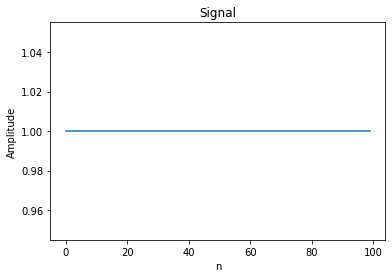

TEST PASSED


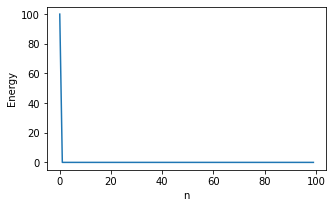

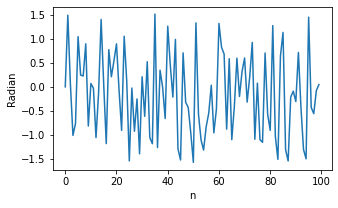

--------------------


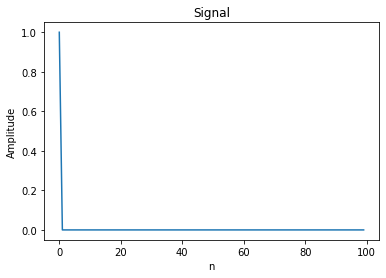

TEST PASSED


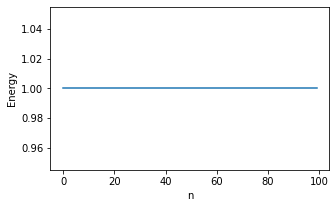

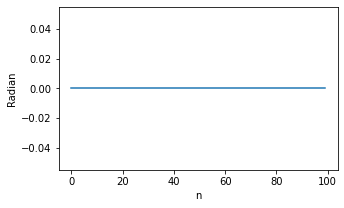

--------------------


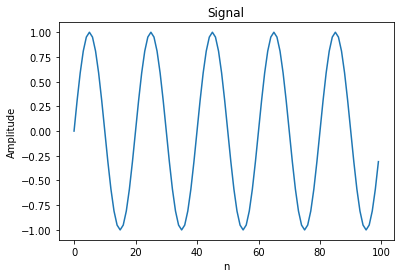

TEST PASSED


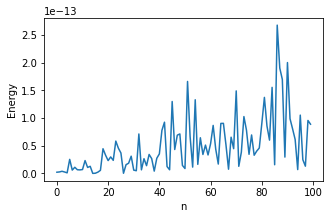

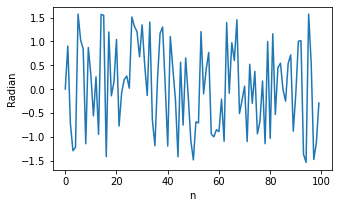

--------------------


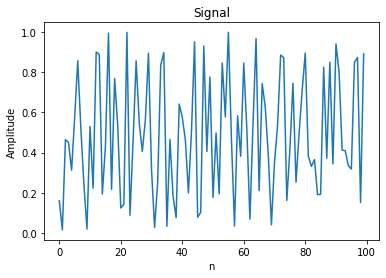

TEST PASSED


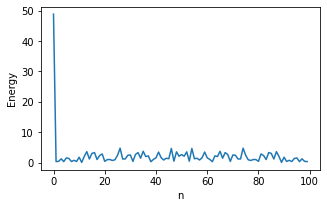

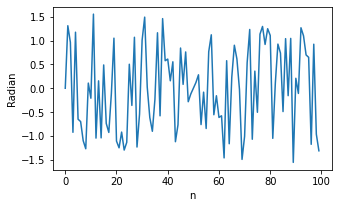

In [205]:
for a in (one_imp, one_jump, sin, random_sig):
    print("--"*10)
    plt.plot(a)
    plt.title("Signal")
    plt.xlabel("n")
    plt.ylabel("Amplitude")
    plt.show()
    test_DTF(a)

----------------------------------
## Анализ паровозного гудка

In [165]:
train_whistle, tw_sr = librosa.core.load("train_whistle.wav")
print(f"Len is {len(train_whistle)} ( ). Sample rate is {tw_sr}")
player = ipd.Audio(train_whistle, rate=tw_sr)
ipd.display(player)

Len is 82175. Sample rate is 22050


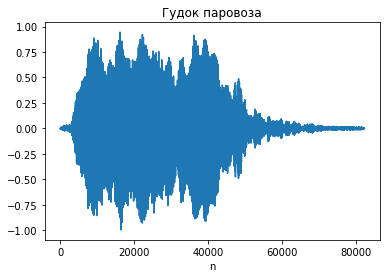

In [183]:
plt.plot(train_whistle)
plt.title("Гудок паровоза")
plt.xlabel("n")
#plt.ylabel("")
plt.show()

-----------
- Построить амплитудные и фазовые спектры сигналов. С использованием дискретного преобразования Фурье проанализировать спектральный состав сигнала паровозного гудка.


Гудок паровоза в частотной области


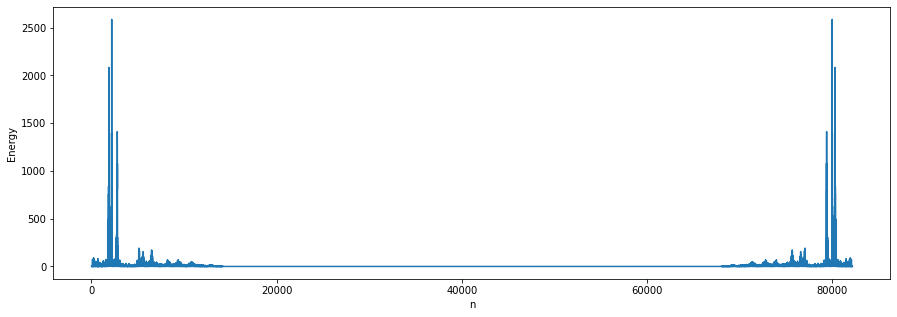

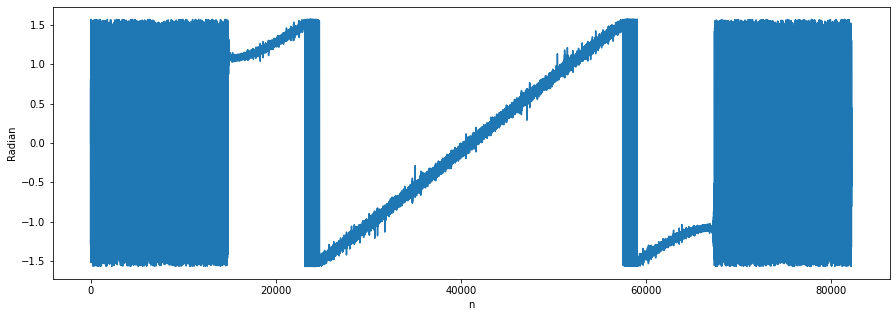

In [246]:
train_whistle_spec = scipy.fft.fft(train_whistle)
print("Гудок паровоза в частотной области")
draw_spec(train_whistle_spec, figsize=(15,5))

-------------------------------
- Построить амплитудный спектр сигнала. Определить на каких частотах расположены три основные гармоники сигнала.


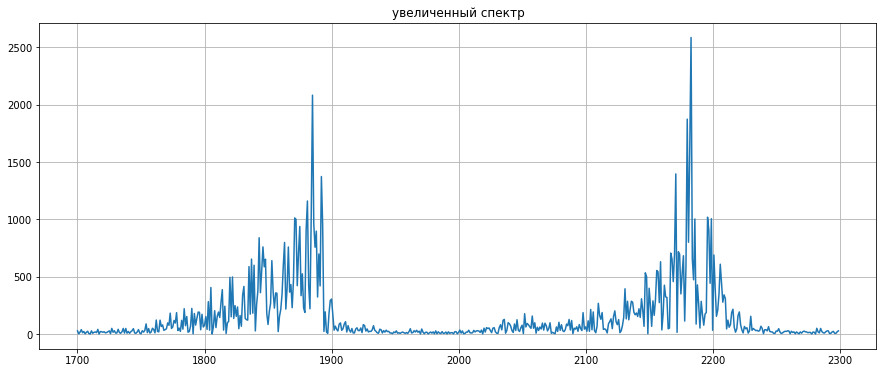

In [236]:
start_n, end_n = 1700,2300#2160, 2200
norm_spec = np.abs(train_whistle_spec.real)
plt.figure(figsize=(15,6))
plt.plot(np.arange(start_n, end_n), norm_spec[start_n:end_n])
plt.title("увеличенный спектр")
plt.grid(True)
plt.show()

In [231]:
top3 = np.argpartition(norm_spec[:len(train_whistle_spec)//2], -3)[-3:]

In [232]:
top3_freqs = top3 * tw_sr/len(train_whistle_spec)
print(f"Топ 3 основные гармоники это {top3_freqs} Гц")

Топ 3 основные гармоники это [584.95892911 505.80164284 585.76391847] Гц


Сгенерируем сигнал, состоящий только из этих гармоник

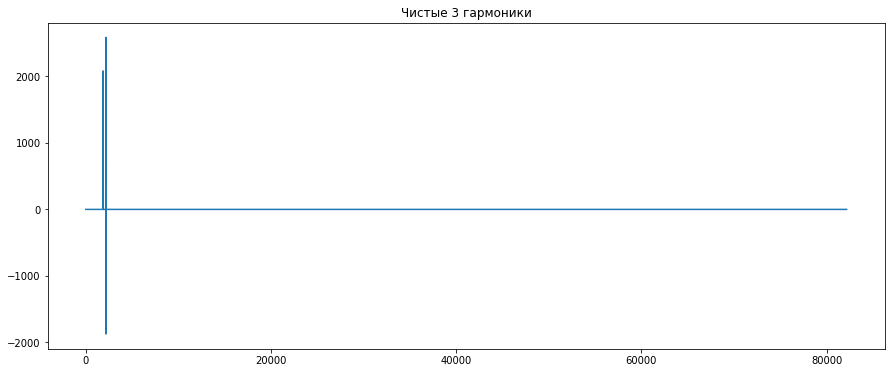

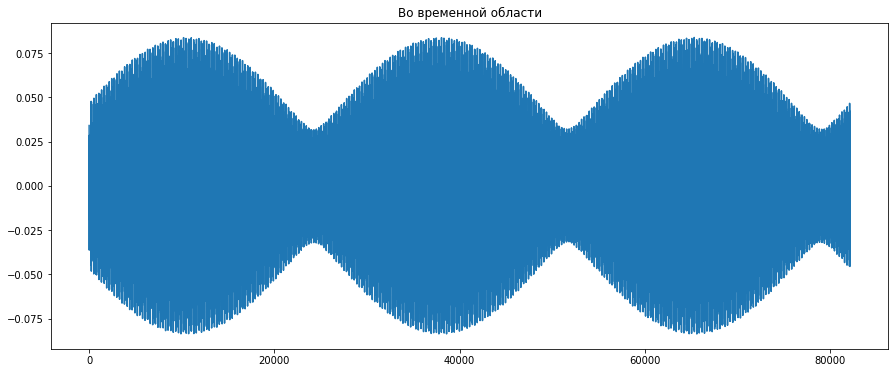

In [242]:
s = np.zeros_like(train_whistle_spec)
for n in top3:
    s[n]=train_whistle_spec[n]
    
plt.figure(figsize=(15,6))
plt.plot(s.real)
plt.title("Чистые 3 гармоники")
plt.show()
gen_wav = scipy.fft.ifft(s)
plt.figure(figsize=(15,6))
plt.plot(gen_wav.real)
plt.title("Во временной области")
plt.show()
player = ipd.Audio(gen_wav.real, rate=tw_sr)
ipd.display(player)

-------------------------------------
- С использованием дискретного преобразования Фурье / оконного преобразования Фурье построить амплитудный спектр / спектрограмму сигнала первого спутника (04.10.1957, СССР).
- Проанализировать полученный результат. 

In [244]:
#sputnik_1.wav
sputnik, sk_sr = librosa.core.load("sputnik_1.wav")
print(f"Len is {len(sputnik)}. Sample rate is {sk_sr}")
player = ipd.Audio(sputnik, rate=tw_sr)
ipd.display(player)

Len is 233344. Sample rate is 22050


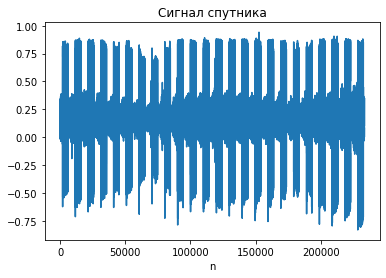

In [245]:
plt.plot(sputnik)
plt.title("Сигнал спутника")
plt.xlabel("n")
#plt.ylabel("")
plt.show()

Спутник в частотной области


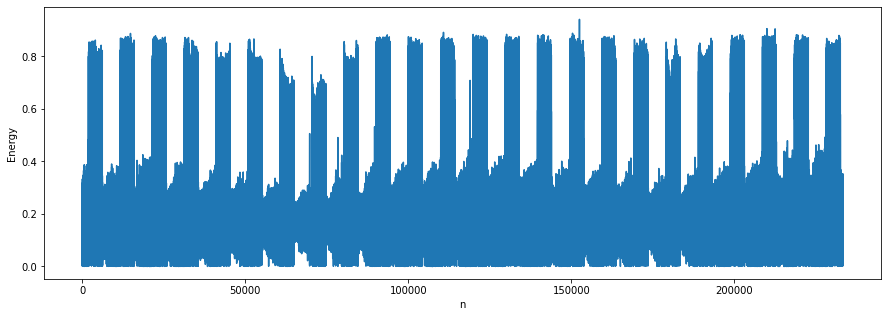

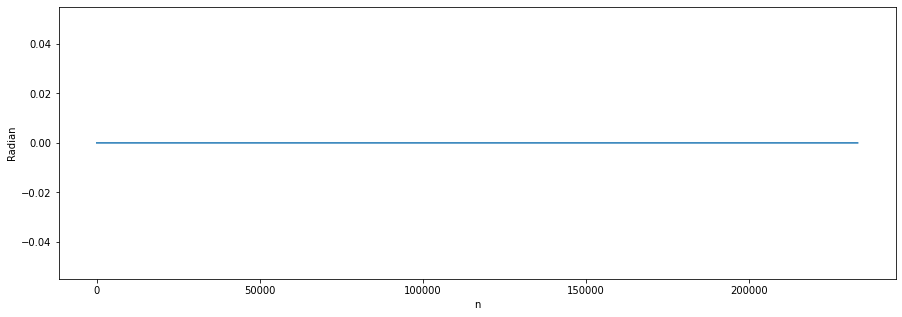

In [247]:
sputnik_spec = scipy.fft.fft(sputnik)
print("Спутник в частотной области")
draw_spec(sputnik, figsize=(15,5))

In [271]:
def draw_sfft(X, sr, figsize=(14, 5)):
    plt.figure(figsize=figsize)
    # X - комплекстная спектрограмма 
    # Для получения энергии достаточно взять модуль
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

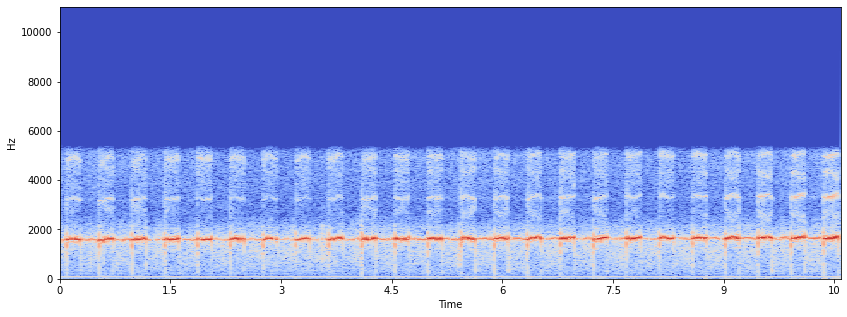

In [278]:
sputnik_sspec = librosa.stft(sputnik)
draw_sfft(sputnik_sspec, sr=sk_sr)

In [276]:
sk_sr

22050


- Проанализировать с использованием оконного преобразования Фурье двухтональный многочастотный сигнал (Dual-Tone Multi-Frequency, DTMF).
- Определить «номер телефона» (порядок набора цифр) закодированный в нём.
- Требуется ответить на вопрос: «Какой спектр сигнала (амплитудный или фазовый) более информативен?» Для ответа на вопрос требуется вычислить амплитудный и фазовый спектры сигнала, а затем выполнить реконструкцию сигнала, используя обратное преобразование Фурье, двумя способами: только по амплитудному спектру, обнулив фазовый; только по фазовому спектру, положив амплитудный равным единице. Прослушать полученные сигнала и сделать соответствующие выводы.

In [254]:
#dtmf.wav
dtmf, dtmf_sr = librosa.core.load("dtmf.wav")
print(f"Len is {len(dtmf)}. Sample rate is {dtmf_sr}")
player = ipd.Audio(dtmf, rate=dtmf_sr)
ipd.display(player)

Len is 243102. Sample rate is 22050


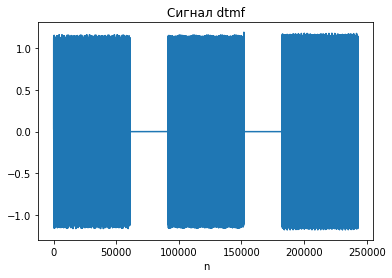

In [257]:
plt.plot(dtmf)
plt.title("Сигнал dtmf")
plt.xlabel("n")
#plt.ylabel("")
plt.show()

dtmf в частотной области


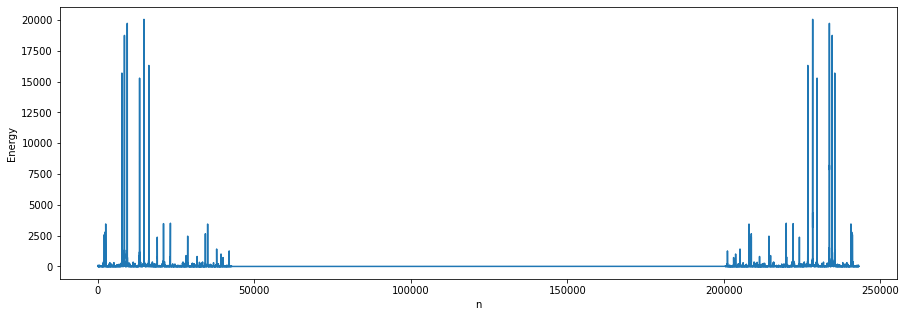

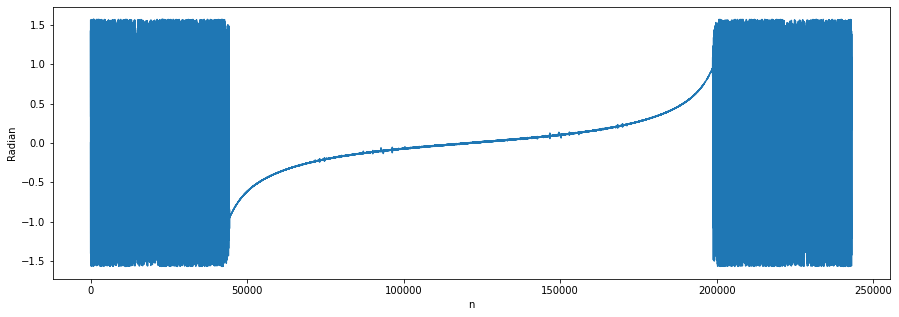

In [258]:
dtmf_spec = scipy.fft.fft(dtmf)
print("dtmf в частотной области")
draw_spec(dtmf_spec, figsize=(15,5))

In [279]:
dtmf_sspec = librosa.stft(dtmf)
dtmf_sspec.shape

(1025, 475)

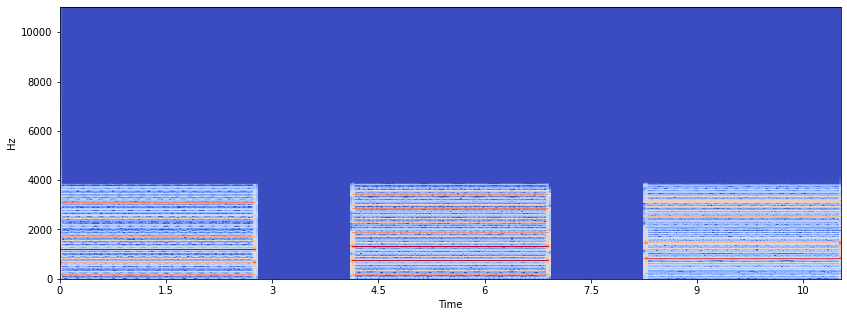

In [282]:
draw_sfft(dtmf_sspec, sr = dtmf_sr)

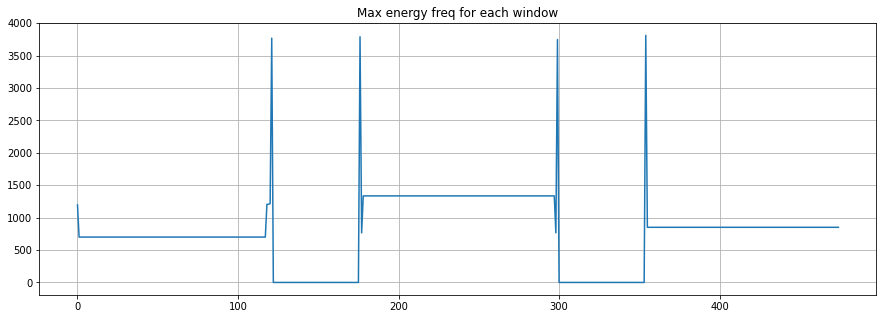

In [299]:
dtmf_max_e_freq = np.argmax(np.abs(dtmf_sspec), axis=0) *dtmf_sr/ 2048
plt.figure(figsize=(15,5))
plt.grid(True)
plt.plot(dtmf_max_e_freq)
plt.title("Max energy freq for each window")
plt.show()

Просто максимума недостаточно, тк сигнал имеет два основных тона

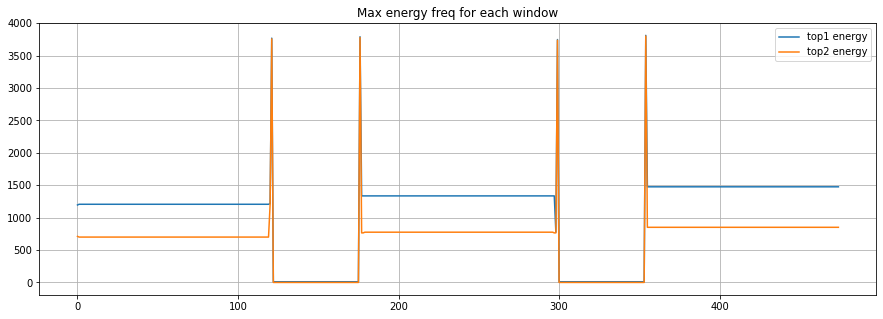

In [304]:
dtmf_top2_e_freq = np.argpartition(-np.abs(dtmf_sspec),kth=2, axis=0)[:2] *dtmf_sr/ 2048
plt.figure(figsize=(15,5))
plt.grid(True)
plt.plot(np.max(dtmf_top2_e_freq, axis=0))
plt.plot(np.min(dtmf_top2_e_freq, axis=0))
plt.title("Max energy freq for each window")
plt.legend(["top1 energy", "top2 energy"])
plt.show()

Как видно из графика, в данном сигнале закодировано 3 символа

In [305]:
numbers_codes = [dtmf_top2_e_freq[:,n] for n in (100, 200, 400)]
numbers_codes

[array([ 699.82910156, 1205.859375  ]),
 array([1335.05859375,  775.1953125 ]),
 array([ 850.56152344, 1475.02441406])]

Используя таблицу с [wiki]:(https://ru.wikipedia.org/wiki/DTMF) декодируем сигнал:

Получается последовательность: **1 5 9**

----------------------------------------- 
### Амплитуда vs фаза
- Требуется ответить на вопрос: «Какой спектр сигнала (амплитудный или фазовый) более информативен?» Для ответа на вопрос требуется вычислить амплитудный и фазовый спектры сигнала, а затем выполнить реконструкцию сигнала, используя обратное преобразование Фурье, двумя способами: только по амплитудному спектру, обнулив фазовый; только по фазовому спектру, положив амплитудный равным единице. Прослушать полученные сигнала и сделать соответствующие выводы.

In [334]:
def compare_signals(signal_spec, sr):
    print("Normal signal")
    wav = scipy.fft.ifft(signal_spec).real
    player = ipd.Audio(wav, rate=sr)
    ipd.display(player)
    plt.plot(wav)
    plt.show()
    print("Zero phi signal")
    signal_0p = signal_spec.copy()
    signal_0p.imag = 0
    wav = scipy.fft.ifft(signal_0p).real
    player = ipd.Audio(wav, rate=sr)
    ipd.display(player)
    plt.plot(wav)
    plt.show()
    print("Zero A signal")
    signal_0a = signal_spec.copy()
    signal_0a /= np.abs(signal_0a)
    wav =scipy.fft.ifft(signal_0a).real
    player = ipd.Audio(wav, rate=sr)
    ipd.display(player)
    plt.plot(wav)
    plt.show()
    return signal_0a, signal_0p

Train
Normal signal


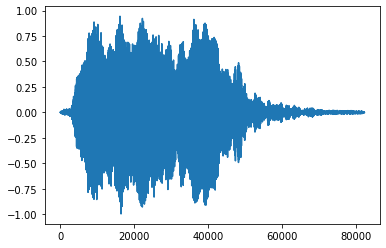

Zero phi signal


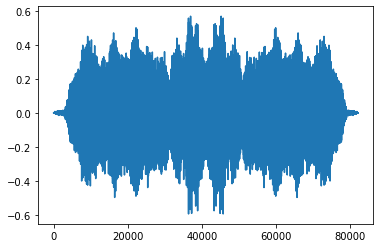

Zero A signal


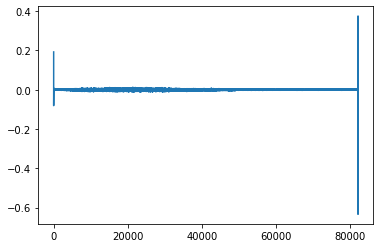

In [335]:
print("Train")
a0, p0 = compare_signals(train_whistle_spec, tw_sr)

В амплитуде хранится большая часть информации.

### MFCC
- Для некоторого речевого сигнала реализовать алгоритм построения мел-частотных кепстральных коэффициентов (Mel-Frequency Cepstral Coefficients, MFCCs)

In [336]:
wav, sr = librosa.load("lab1/mitrofanov_lab1.wav")

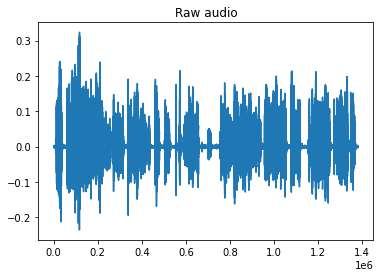

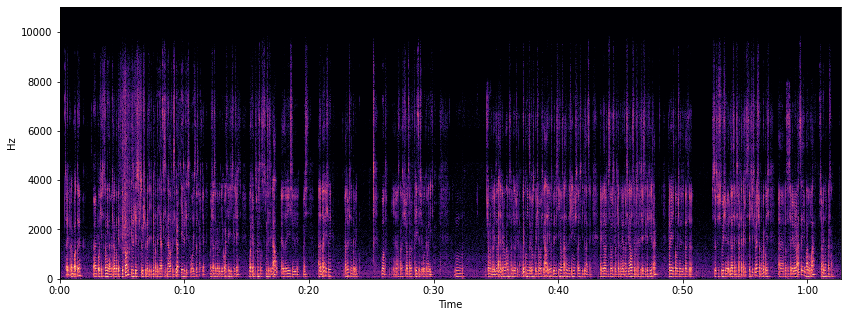

In [338]:
player = ipd.Audio(wav, rate=sr)
ipd.display(player)
plt.plot(wav)
plt.title("Raw audio")
wav_sspec = librosa.stft(wav)
draw_sfft(wav_sspec, sr=sr)

In [420]:
def get_mfcc(wav, sr, window_ms=25, step_mc=10, n_mfcc=13):
    n_fft = window_ms * sr//1000
    hop_length = step_mc * sr//1000
    S = np.power(np.abs(librosa.stft(wav, n_fft=n_fft, hop_length=hop_length)), 2)
    filters_mel = librosa.filters.mel(sr, n_fft)
    mel_s = np.dot(filters_mel, S)
    mel_s_log = librosa.power_to_db(mel_s)
    mfcc = scipy.fftpack.dct(mel_s_log, axis=0, norm='ortho')[:n_mfcc]
    return mfcc

In [423]:
def test_mfcc(wav, sr, window_ms=25, step_mc=10, n_mfcc=13):
    n_fft = window_ms * sr//1000
    hop_length = step_mc * sr//1000
    mel_s = librosa.power_to_db(librosa.feature.melspectrogram(wav, sr=sr, n_fft=n_fft, hop_length=hop_length))
    mfcc_lib = librosa.feature.mfcc(wav, sr, S=mel_s, n_fft=n_fft, hop_length=hop_length, n_mfcc=n_mfcc)
    mfcc = get_mfcc(wav, sr, window_ms=window_ms, step_mc=step_mc, n_mfcc=n_mfcc)
    if not np.allclose(mfcc_lib, mfcc):
        print("TEST FAILED")
        print(mfcc_lib)
        print(mfcc)
        return -1
    print("TEST PASSED")
    return 0

In [428]:
test_mfcc(wav[:sr*2], sr)
test_mfcc(wav, sr)

TEST PASSED
TEST PASSED


0

In [429]:
mfcc = get_mfcc(wav, sr)

Text(0, 0.5, 'Filter number')

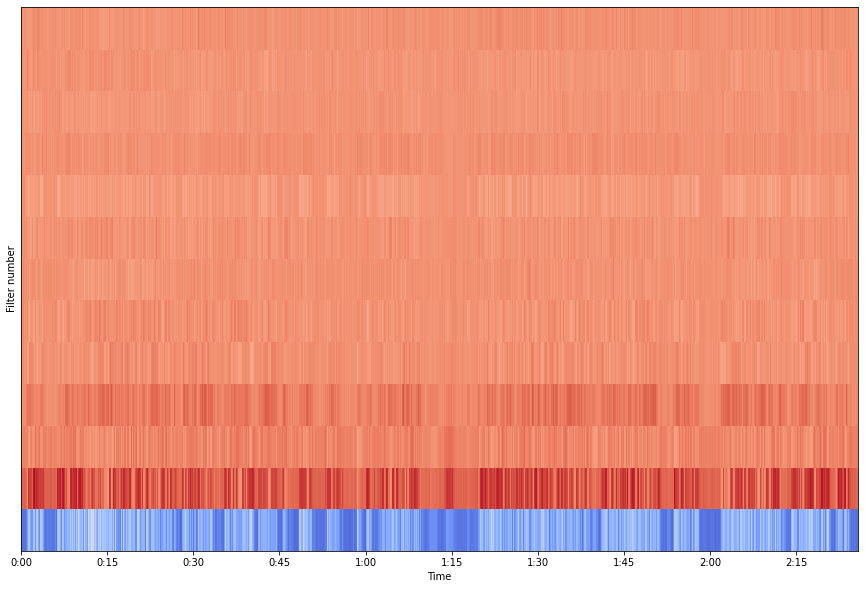

In [437]:
plt.figure(figsize=(15,10))
librosa.display.specshow(mfcc, sr=sr, x_axis='time')
plt.ylabel("Filter number")

In [441]:
print(mfcc[:,:4])

[[-7.6885968e+02 -7.4732831e+02 -7.2908356e+02 -7.2627118e+02]
 [ 3.9937339e+00  2.9967585e+01  5.0193634e+01  5.4211010e+01]
 [ 3.7007322e+00  2.0897461e+01  2.8436642e+01  3.2719677e+01]
 [ 3.2335486e+00  1.5054590e+01  1.1043785e+01  1.6165615e+01]
 [ 2.6221368e+00  1.3409252e+01  4.1799464e+00  1.0958440e+01]
 [ 1.9050784e+00  1.0575928e+01  1.6170821e+00  1.0541432e+01]
 [ 1.1265514e+00  4.0975018e+00 -2.8065097e+00  7.6333852e+00]
 [ 3.3297712e-01 -1.4098635e+00 -6.6557264e+00  3.3273094e+00]
 [-4.3042958e-01 -1.1889437e+00 -4.9129734e+00  2.2583332e+00]
 [-1.1228843e+00  2.2195535e+00  6.6549194e-01  3.8911872e+00]
 [-1.7107850e+00  2.1678100e+00  3.3041301e+00  3.4403772e+00]
 [-2.1697164e+00 -2.9087412e+00  6.2791812e-01 -3.2524544e-01]
 [-2.4856110e+00 -7.5652003e+00 -2.7191985e+00 -3.1400893e+00]]
